**Milestone 1- Project 2**                                                                    
Group 2


***Import Dependencies and "Pretty" Each CSV***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# List of CSV files to merge
data_path = "/Users/addisonlowman/DS4002P2/DATA/"

# List of CSV files to merge with their full paths
csv_files = [data_path + 'fixedGSSeverdivorced.csv',
             data_path + 'hapmar.csv',
             data_path + 'fixedGSShighestschoolspouse.csv',
             data_path + 'fixedGSSincome.csv',
             data_path + 'fixedGSSmaritalstatus.csv',
             data_path + 'children.csv',
             data_path + 'fixedGSSspouselaborstatus.csv']

# Read each CSV file into a DataFrame
dfs = [pd.read_csv(file) for file in csv_files]

# Merge DataFrames on 'ID' and 'Year'
merged_df = dfs[0]  # Start with the first DataFrame
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on=['id', 'year'], how='outer')

# Display the merged DataFrame
print(merged_df)

       code_divorced  label_divorced  year    id  code_hapmar  label_hapmar  \
0               -100            -100  1972     1         -100          -100   
1               -100               2  1972     2         -100          -100   
2               -100               2  1972     3         -100          -100   
3               -100               2  1972     4         -100          -100   
4               -100               2  1972     5         -100          -100   
...              ...             ...   ...   ...          ...           ...   
72385              1            -100  2022  3541            1          -100   
72386              1               1  2022  3542            1             1   
72387              2            -100  2022  3543            2          -100   
72388              3               2  2022  3544            3             1   
72389              2               2  2022  3545            2             2   

       code_highschools  label_highschools  code_in

In [4]:
columns_to_drop = ['code_divorced', 'code_hapmar', 'code_highschools', 'code_income', 'code_maritalstatus', 'code_child', 'code_sls']

# Drop the columns
df_dropped = merged_df.drop(columns=columns_to_drop)

# Display the DataFrame after dropping columns
print(df_dropped)

       label_divorced  year    id  label_hapmar  label_highschools  \
0                -100  1972     1          -100               -100   
1                   2  1972     2          -100                 12   
2                   2  1972     3          -100                 11   
3                   2  1972     4          -100                 20   
4                   2  1972     5          -100                 12   
...               ...   ...   ...           ...                ...   
72385            -100  2022  3541          -100               -100   
72386               1  2022  3542             1                 16   
72387            -100  2022  3543          -100               -100   
72388               2  2022  3544             1                 19   
72389               2  2022  3545             2                 19   

       label_income  label_maritalstatus  label_child  label_sls  
0              -100                    5            0       -100  
1              -100      

In [5]:
variables_to_check = ['label_divorced', 'label_hapmar', 'label_highschools', 'label_income', 
                      'label_maritalstatus', 'label_child', 'label_sls']

# Define the value to drop
value_to_drop = [-100, -99, -98, -97, -96, -90]

# Create a mask to identify rows with the specified value to drop
mask = df_dropped[variables_to_check].isin(value_to_drop).any(axis=1)

# Drop rows based on the mask
df_filtered = df_dropped[~mask]

print(df_filtered)

       label_divorced  year    id  label_hapmar  label_highschools  \
1613                2  1973     1             1                  7   
1614                2  1973     2             1                  8   
1615                2  1973     3             1                 11   
1616                2  1973     4             1                 12   
1617                2  1973     5             2                  9   
...               ...   ...   ...           ...                ...   
72380               2  2022  3536             1                 12   
72381               1  2022  3537             1                 17   
72386               1  2022  3542             1                 16   
72388               2  2022  3544             1                 19   
72389               2  2022  3545             2                 19   

       label_income  label_maritalstatus  label_child  label_sls  
1613              9                    1            1          7  
1614              7      

In [6]:
df_filtered.to_csv("NewGSSdata1.csv")

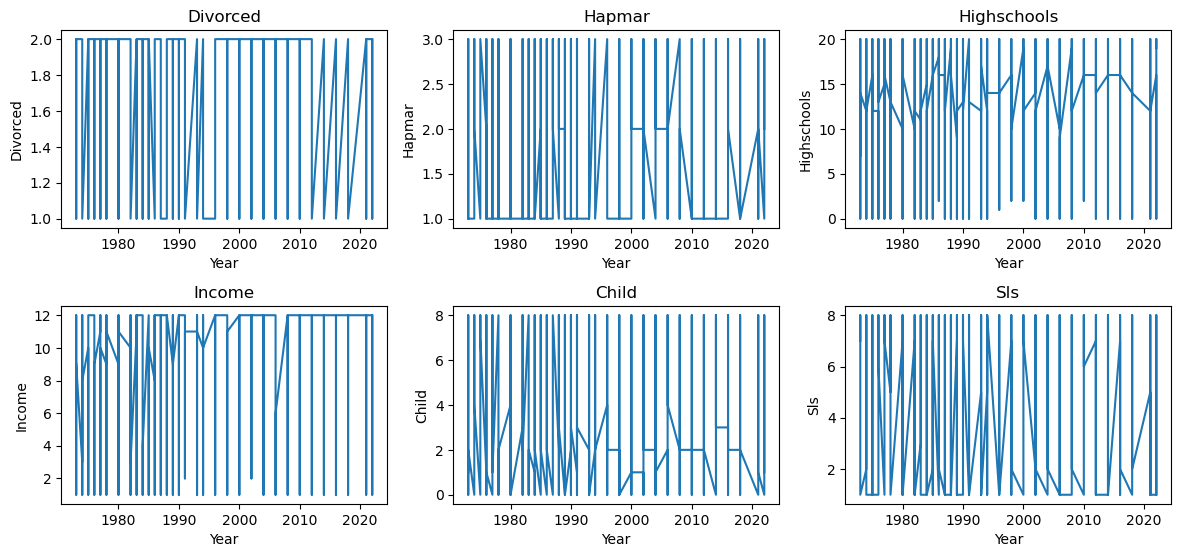

In [8]:
years = df_filtered['year']
variables = ['label_divorced', 'label_hapmar', 'label_highschools', 'label_income', 'label_child', 'label_sls']

# Create separate line graphs for each variable
plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, start=1):
    plt.subplot(3, 3, i)
    plt.plot(years, df_filtered[var])
    plt.xlabel('Year')
    plt.ylabel(var.replace('label_', '').title())
    plt.title(var.replace('label_', '').title())

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
years = df_filtered['year']
variables = ['label_divorced', 'label_hapmar', 'label_highschools', 'label_income', 'label_maritalstatus', 'label_children', 'label_sls']

# Create separate bar graphs for each variable
plt.figure(figsize=(12, 8))

for i, var in enumerate(variables, start=1):
    plt.subplot(3, 3, i)
    plt.bar(years, df_filtered[var], color='skyblue')
    plt.xlabel('Year')
    plt.ylabel(var.replace('label_', '').title())
    plt.title(var.replace('label_', '').title())

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()

*Divorce*

In [ ]:
divorce = pd.read_csv("fixedGSSeverdivorced.csv")
divorce.head()

*Marriage Happiness*

In [ ]:
marriage = pd.read_csv("fixedGSShappinessofmarriage.csv")
marriage.head()

*Highest Level of School Completed, Spouse*

In [ ]:
school = pd.read_csv("fixedGSShighestschoolspouse.csv")
school.head()

*Income*

In [ ]:
income = pd.read_csv("fixedGSSincome.csv")
income.head()

*Marital Status*

In [ ]:
mstatus = pd.read_csv("fixedGSSmaritalstatus.csv")
mstatus.head()

*Number of Children*

In [ ]:
children = pd.read_csv("fixedGSSnumberofchildren.csv")
children.head()

*Labor Status, Spouse*

In [ ]:
labor = pd.read_csv("fixedGSSspouselaborstatus.csv")

labor.head()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['year'], df_filtered['label_divorced'])
plt.xlabel('Year')
plt.ylabel('Label Divorced')
plt.title('Label Divorced Over Time')
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_filtered['year'], df_filtered['label_hapmar'])
plt.xlabel('Year')
plt.ylabel('Label Divorced')
plt.title('Label Divorced Over Time')
plt.grid(True)
plt.show()

In [28]:
child_counts = df_filtered.groupby(['year', 'label_child']).size().reset_index(name='count')

print(child_counts)

     year  label_child  count
0    1973            0    142
1    1973            1    144
2    1973            2    287
3    1973            3    180
4    1973            4    119
..    ...          ...    ...
292  2022            4     95
293  2022            5     35
294  2022            6     17
295  2022            7      9
296  2022            8      8

[297 rows x 3 columns]


In [29]:
hap_counts = df_filtered.groupby(['year', 'label_hapmar']).size().reset_index(name='count')

print(hap_counts)

    year  label_hapmar  count
0   1973             1    674
1   1973             2    293
2   1973             3     25
3   1974             1    661
4   1974             2    268
..   ...           ...    ...
94  2021             2    609
95  2021             3     63
96  2022             1    783
97  2022             2    444
98  2022             3     64

[99 rows x 3 columns]


In [30]:
income_counts = df_filtered.groupby(['year', 'label_income']).size().reset_index(name='count')

print(income_counts)

     year  label_income  count
0    1973             1     11
1    1973             2     38
2    1973             3     50
3    1973             4     46
4    1973             5     45
..    ...           ...    ...
381  2022             8      2
382  2022             9     12
383  2022            10     13
384  2022            11     34
385  2022            12   1204

[386 rows x 3 columns]


In [31]:
div_counts = df_filtered.groupby(['year', 'label_divorced']).size().reset_index(name='count')

print(div_counts)

    year  label_divorced  count
0   1973               1    126
1   1973               2    866
2   1974               1    133
3   1974               2    828
4   1975               1    146
..   ...             ...    ...
61  2018               2    688
62  2021               1    442
63  2021               2   1286
64  2022               1    349
65  2022               2    942

[66 rows x 3 columns]


In [9]:
from sklearn.linear_model import LinearRegression

In [12]:
X = df_filtered[['label_hapmar', 'label_income', 'label_child']]
y = df_filtered['label_divorced']  # Replace 'Dependent_Variable_Column' with your actual dependent variable

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X, y)

# Print the coefficients
print("Coefficients:")
for i, var in enumerate(X.columns):
    print(f"{var}: {model.coef_[i]}")

# Print the intercept
print("Intercept:", model.intercept_)

# Print R-squared value
print("R-squared:", model.score(X, y))

Coefficients:
label_hapmar: -0.020458782467546902
label_highschools: 0.0051266370378604265
label_income: -0.011805566298159171
label_child: -0.01683336266947395
label_sls: 0.002132537343763163
Intercept: 1.9101359218790497
R-squared: 0.009421034499330072


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression

/var/folders/v0/d0ppvnjs2jndbrp2bbdh8pkh0000gn/T/ipykernel_83669/209607879.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_filtered['label_divorced'])


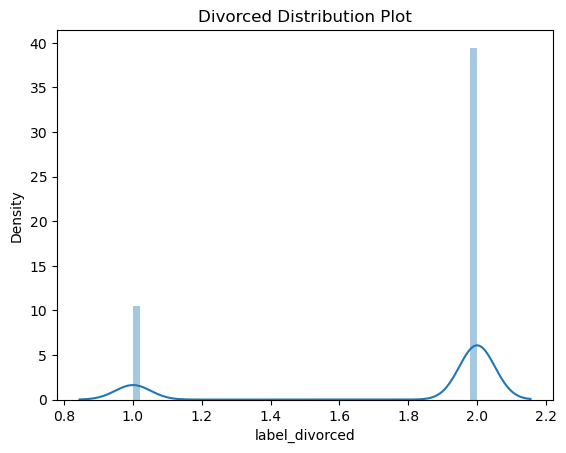

In [14]:
plt.title('Divorced Distribution Plot')
sns.distplot(df_filtered['label_divorced'])
plt.show()

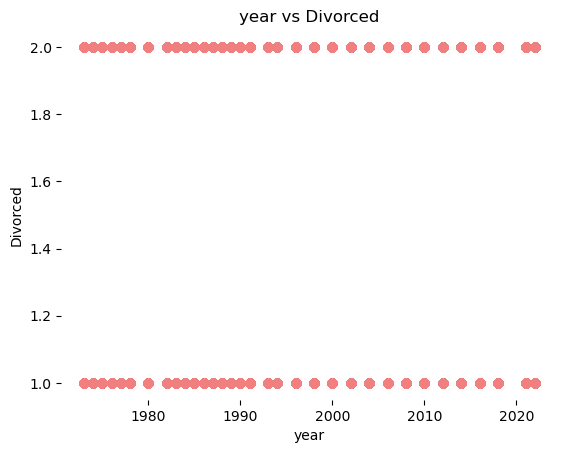

In [22]:
plt.scatter(df_filtered['year'], df_filtered['label_divorced'], color = 'lightcoral')
plt.title('year vs Divorced')
plt.xlabel('year')
plt.ylabel('Divorced')
plt.box(False)
plt.show()

In [23]:
X = df_filtered[['year']]
y = df_filtered[['label_divorced']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [24]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred_test = regressor.predict(X_test)     # predicted value of y_test
y_pred_train = regressor.predict(X_train)

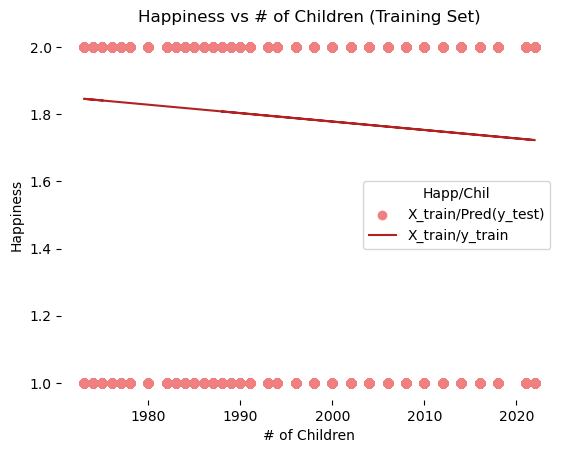

In [26]:
plt.scatter(X_train, y_train, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Happiness vs # of Children (Training Set)')
plt.xlabel('# of Children')
plt.ylabel('Happiness')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Happ/Chil', loc='best', facecolor='white')
plt.box(False)
plt.show()

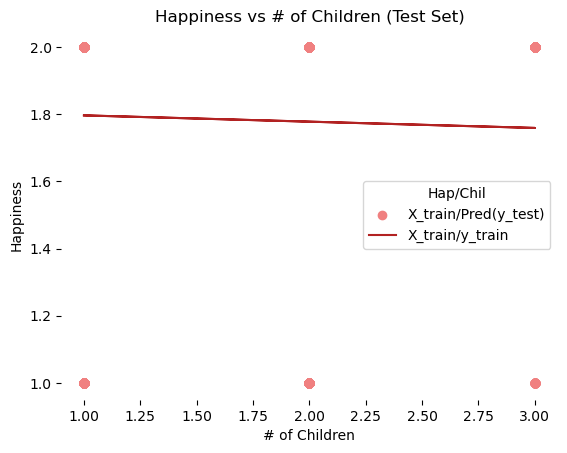

In [21]:
plt.scatter(X_test, y_test, color = 'lightcoral')
plt.plot(X_train, y_pred_train, color = 'firebrick')
plt.title('Happiness vs # of Children (Test Set)')
plt.xlabel('# of Children')
plt.ylabel('Happiness')
plt.legend(['X_train/Pred(y_test)', 'X_train/y_train'], title = 'Hap/Chil', loc='best', facecolor='white')
plt.box(False)
plt.show()